In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

# Adding directory path

In [2]:
DIRECTORIES = r'male-female'
FEACHERS = ['female','male']

# Adding all the images and corresponding lebel into the list name data

In [3]:
data = []

for feachers in FEACHERS:
    folder = os.path.join(DIRECTORIES,feachers)
    lebel = FEACHERS.index(feachers)
   
    for img in os.listdir(folder):
        pic = os.path.join(folder,img)
        img_arr = cv2.imread(pic)
        img_arr = cv2.resize(img_arr, (256,256))
        data.append([img_arr,lebel])
        

In [4]:
len(data)

200

# Shuffling the data

In [5]:
import random
random.shuffle(data)

# showing an image

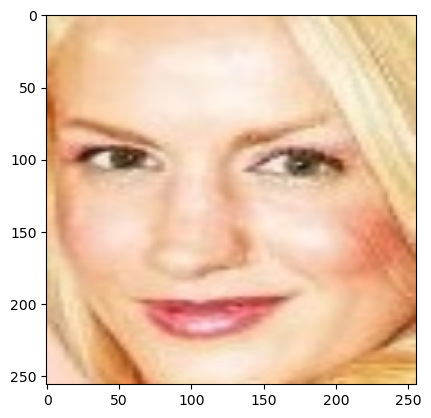

In [6]:
plt.imshow(cv2.cvtColor(data[2][0], cv2.COLOR_BGR2RGB))

# String images and corresponding lebel into two diff. lists

In [7]:
x = []
y = []
for feachers,lebel in data:
    x.append(feachers)
    y.append(lebel)

# Converting those lists into  array

In [8]:
x = np.array(x)
y = np.array(y)

# Cheaking shape of array

 x.shape

# Dividing with 255 to rescale all the pixel between 0 to 1

In [9]:
x = x/255

# Importing all necessery libraries for model building

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten

# Creating the mode


In [11]:
model = Sequential()
model.add(Conv2D(64,strides = 2,padding='same', kernel_size=3, input_shape=x[0].shape, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),input_shape=x[0].shape, activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'SGD', metrics=['accuracy'])


In [13]:
model.fit(x,y,epochs=25, batch_size=5)

Epoch 1/25
40/40 [==============================] - 4s 89ms/step - loss: 0.7293 - accuracy: 0.5600
Epoch 2/25
40/40 [==============================] - 3s 82ms/step - loss: 0.6922 - accuracy: 0.6150
Epoch 3/25
40/40 [==============================] - 3s 77ms/step - loss: 0.6784 - accuracy: 0.5800
Epoch 4/25
40/40 [==============================] - 3s 80ms/step - loss: 0.6624 - accuracy: 0.6400
Epoch 5/25
40/40 [==============================] - 3s 73ms/step - loss: 0.6421 - accuracy: 0.6100
Epoch 6/25
40/40 [==============================] - 3s 79ms/step - loss: 0.6111 - accuracy: 0.7200
Epoch 7/25
40/40 [==============================] - 3s 75ms/step - loss: 0.6319 - accuracy: 0.7000
Epoch 8/25
40/40 [==============================] - 3s 73ms/step - loss: 0.6423 - accuracy: 0.6950
Epoch 9/25
40/40 [==============================] - 3s 74ms/step - loss: 0.5927 - accuracy: 0.6900
Epoch 10/25
40/40 [==============================] - 3s 72ms/step - loss: 0.5581 - accuracy: 0.7800
Epoch 11/

# Testing the model with a image

1/1 [==============================] - 0s 123ms/step
This is a picture of a man


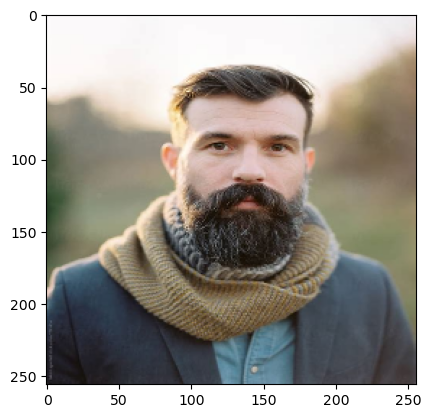

In [14]:
test_pic = cv2.imread(r'male-female/male-test.jpg')
test_pic = cv2.resize(test_pic, (256,256))
plt.imshow(cv2.cvtColor(test_pic, cv2.COLOR_BGR2RGB))
test_pic = np.expand_dims(test_pic, axis=0)
rslt = model.predict(test_pic)
ans = max(max(rslt))
if rslt[0][0]==ans:
    print("This is a picture of a woman")
else:
    print("This is a picture of a man")

1/1 [==============================] - 0s 36ms/step
This is a picture of a man


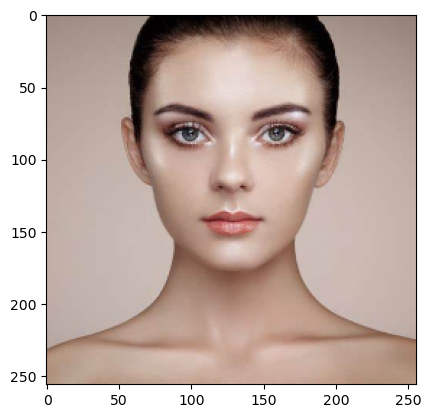

In [15]:
test_pic = cv2.imread(r'male-female/female-test.jpg')
test_pic = cv2.resize(test_pic, (256,256))
plt.imshow(cv2.cvtColor(test_pic, cv2.COLOR_BGR2RGB))
test_pic = np.expand_dims(test_pic, axis=0)
rslt = model.predict(test_pic)
ans = max(max(rslt))
if rslt[0][0]==ans:
    print("This is a picture of a woman")
else:
    print("This is a picture of a man")